<center><h1>Ong Willis HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, precision_score

Get the Vertebral Column Data Set

In [2]:
dataset = pd.read_csv("/Users/willisong/Desktop/homework-1-WillisYOng/HW1/vertebral_column_data/column_2C.dat",sep=" ", header=None)
dataset.columns = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'degree spondylolisthesis', 'labels']

In [3]:
dataset['label'] = dataset['labels'].replace({'AB':1, 'NO':0})
dataset.drop(['labels'], axis=1, inplace=True)

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

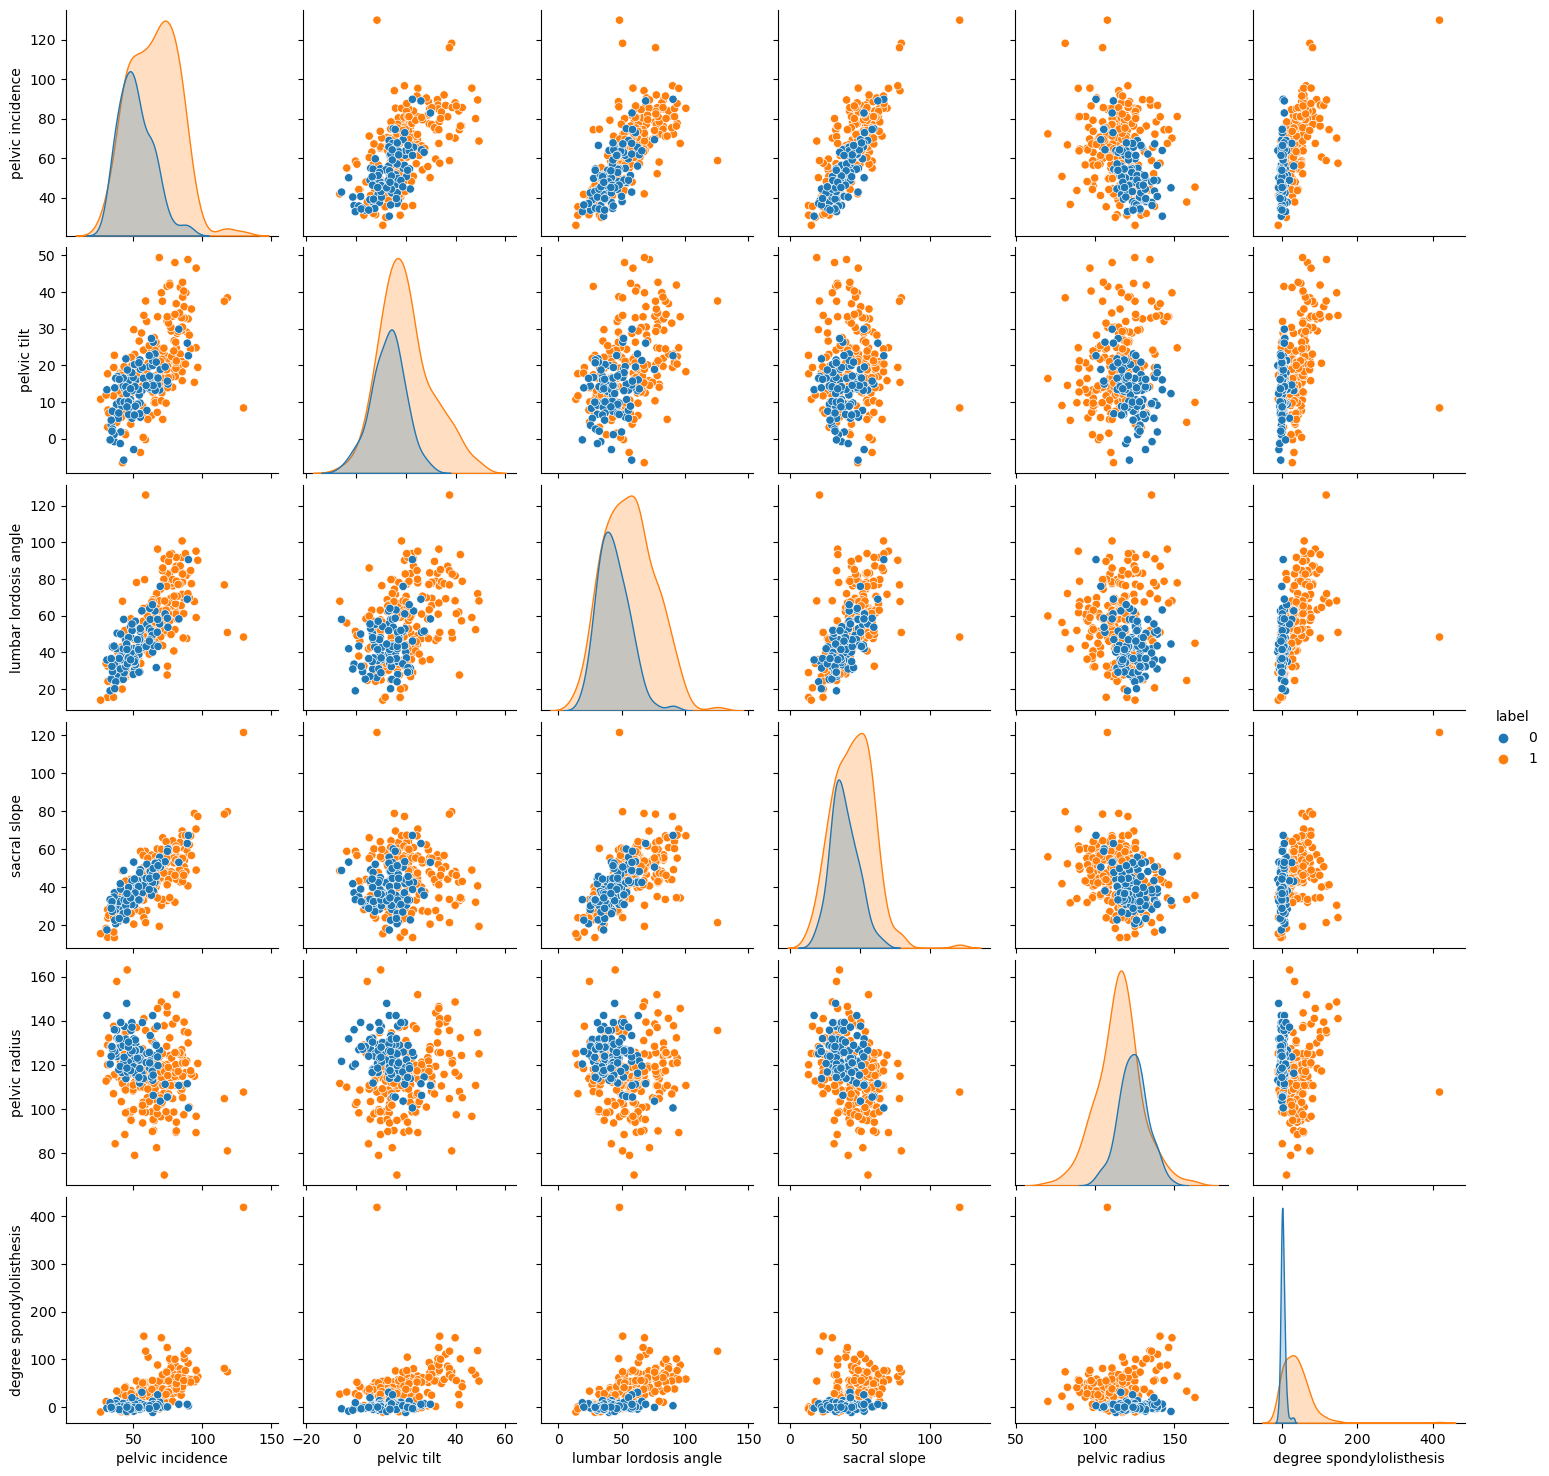

In [5]:
pairplot = sns.pairplot(dataset, hue='label')
plt.show()

#### ii. Boxplots

In [5]:
def plot_variables_vs_labels_boxplot(feature):
    plt.figure(figsize=(3, 3))
    plt.subplot()
    
    sns.boxplot(data=dataset, x="label",y=feature)
    plt.title('Box plot of ' + feature)
    plt.xticks([0, 1], ['Normal', 'Abnormal'])
    plt.show()

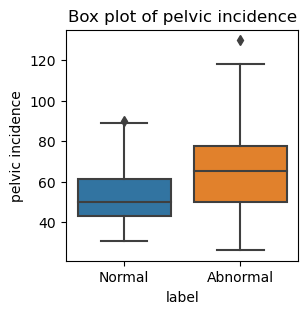

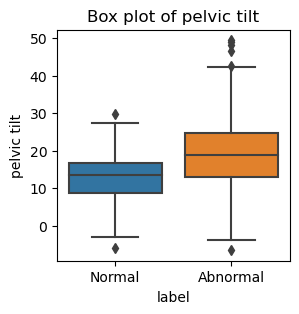

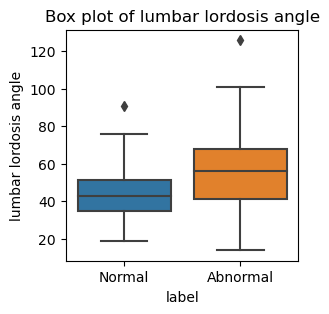

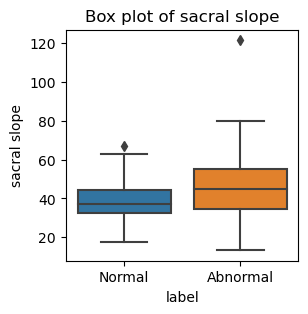

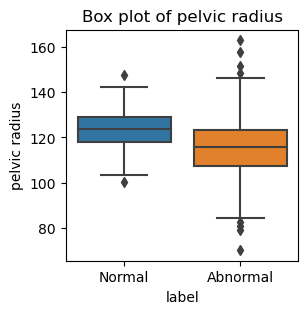

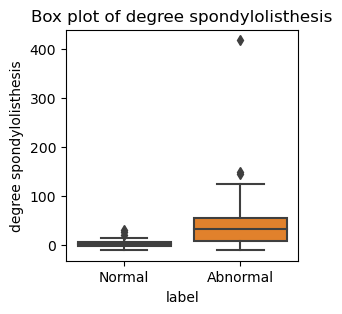

In [6]:
for column in dataset.columns[:-1]:
    plot_variables_vs_labels_boxplot(column)

#### iii. Split Data Set

In [98]:
dataset_abnormal = dataset[dataset['label'] == 1]
dataset_abnormal_train = dataset_abnormal.iloc[:140]
dataset_abnormal_test = dataset_abnormal[140:]

dataset_normal = dataset[dataset['label'] == 0]
dataset_normal_train = dataset_normal.iloc[:70]
dataset_normal_test = dataset_normal.iloc[70:]

train_data = pd.concat([dataset_normal_train, dataset_abnormal_train], axis=0)

train_X = train_data[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'degree spondylolisthesis']]
train_y = train_data['label']

test_data = pd.concat([dataset_normal_test, dataset_abnormal_test], axis=0)

test_X = test_data[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'degree spondylolisthesis']]
test_y = test_data['label']

### (c) Classification

In [8]:
def KNN(K, p, train_X, train_y, test_X, test_y):
    train_errors = []
    test_errors = []
    
    for k in K:
        KNN_model = KNeighborsClassifier(n_neighbors=k, p=p)
        KNN_model.fit(train_X, train_y)

        train_predictions = KNN_model.predict(train_X)
        train_error = 1-accuracy_score(train_y, train_predictions)

        test_predictions = KNN_model.predict(test_X)
        test_error = 1-accuracy_score(test_y, test_predictions)

        train_errors.append(train_error)
        test_errors.append(test_error)

        
    return train_errors, test_errors

#### i. Euclidean Metric

In [9]:
K = [i for i in range(208, 0, -3)]
p = 2

train_errors, test_errors = KNN(K, p, train_X, train_y, test_X, test_y)

#### ii. Test Data

In [19]:
def plot_train_vs_test_error(train_error, test_error, K):
    plt.plot(K, train_error, label = 'Train Error')
    plt.plot(K, test_error, label = 'Test Error')

    plt.xlabel('k')
    plt.ylabel('Error')
    plt.gca().invert_xaxis()
    plt.title('Errors vs k')
    plt.legend()
    plt.show()

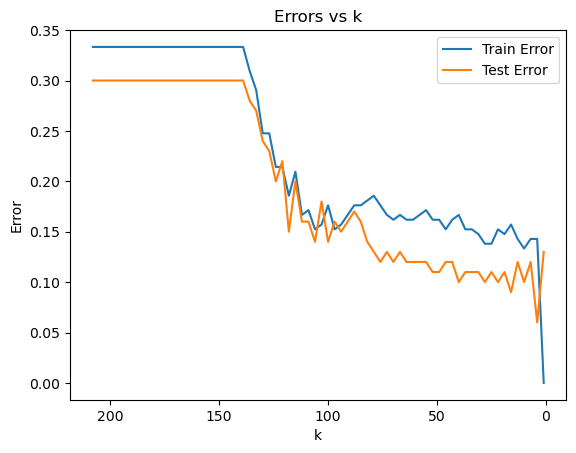

In [20]:
plot_train_vs_test_error(train_errors, test_errors, K)

In [28]:
def knn_euclid_best_k_predictions(k, p, train_X, train_y, test_X):
    KNN_model = KNeighborsClassifier(n_neighbors=k, p=p)
    KNN_model.fit(train_X, train_y)

    train_predictions = KNN_model.predict(train_X)

    test_predictions = KNN_model.predict(test_X)

    return train_predictions, test_predictions

In [29]:
best_k = K[np.argmin(test_errors)]
p=2
print('Among the values of K, the best k, k* =', best_k)

Among the values of K, the best k, k* = 4


In [30]:
train_predictions_best_k, test_predictions_best_k = knn_euclid_best_k_predictions(best_k, p, train_X, train_y, test_X)

In [47]:
c_matrix = confusion_matrix(test_y, test_predictions_best_k)
#True positive rate = TP/(TP+FN)
true_pos_rate = c_matrix[0][0]/(c_matrix[0][0]+ c_matrix[0][1])
#True negative rate = TN/(FP+TN)
true_neg_rate = c_matrix[1][1]/(c_matrix[1][1]+ c_matrix[1][0])
F1_score = f1_score(test_y, test_predictions_best_k)
precision = precision_score(test_y, test_predictions_best_k)

print('Confusion matrix:', c_matrix)
print('True positive rate:', true_pos_rate)
print('True positive rate:', true_neg_rate)
print('F1 score:', F1_score)
print('Precision:', precision)

Confusion matrix: [[25  5]
 [ 1 69]]
True positive rate: 0.8333333333333334
True positive rate: 0.9857142857142858
F1 score: 0.9583333333333334
Precision: 0.9324324324324325


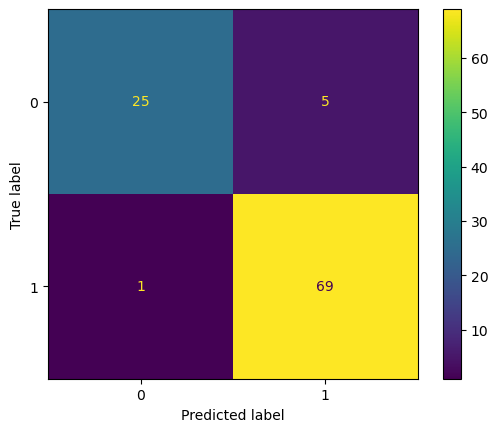

In [49]:
#This is the display of the confusion matrix
display = ConfusionMatrixDisplay(c_matrix)
display.plot()
plt.show()

#### iii. Learning Curve

In [133]:
def get_learning_curve(abnormal_train, normal_train, test_X, test_y, p):
    N = list(range(10, 220, 10))

    test_errors = []

    for n in N:
        abnormal_train_N = normal_train.iloc[:n//3]
        normal_train_N = abnormal_train.iloc[:n-n//3]

        train_data_N = pd.concat([abnormal_train_N, normal_train_N], axis=0)

        train_X_N = train_data_N[['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'degree spondylolisthesis']]
        train_y_N = train_data_N['label']

        test_errors_N = []

        K = list(range(1, n+1, 5))

        train_error_k, test_error_k = KNN(K, p, train_X_N, train_y_N, test_X, test_y)

        test_errors.append(min(test_error_k))

    return N, test_errors

In [121]:
def plot_learning_curve(N, test_error_rates):
    plt.plot(N, test_error_rates)
    plt.xlabel('Size of Training Set')
    plt.ylabel('Best Test Error')
    plt.title('Best Test Error vs Training Set Size')
    plt.show()

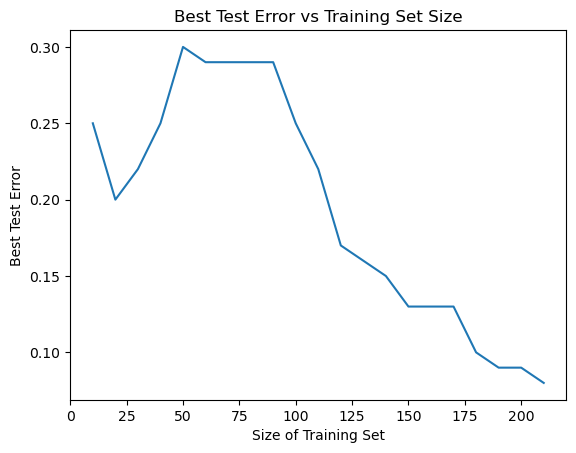

In [132]:
p = 2
N, test_errors_learning_curve = get_learning_curve(dataset_abnormal_train, dataset_normal_train, test_X, test_y, p)

plot_learning_curve(N, test_errors_learning_curve)

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [63]:
K_manhattan = [i for i in range(1, 200, 5)]
p = 1

train_errors_manhattan, test_errors_manhattan = KNN(K_manhattan, p, train_X, train_y, test_X, test_y)

best_k_manhattan = K[np.argmin(test_errors_manhattan)]
best_test_error_manhattan = test_errors_manhattan[np.argmin(test_errors_manhattan)]

print('The best k, k* =', best_k_manhattan)
print('The best test error =', best_test_error_manhattan)

The best k, k* = 6
The best test error = 0.10999999999999999


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [59]:
def KNN_log(k, P, train_X, train_y, test_X, test_y):
    train_errors = []
    test_errors = []
    
    for p in P:
        KNN_model = KNeighborsClassifier(n_neighbors=k, p=p)
        KNN_model.fit(train_X, train_y)

        train_predictions = KNN_model.predict(train_X)
        train_error = 1-accuracy_score(train_y, train_predictions)

        test_predictions = KNN_model.predict(test_X)
        test_error = 1-accuracy_score(test_y, test_predictions)

        train_errors.append(train_error)
        test_errors.append(test_error)

        
    return train_errors, test_errors

In [62]:
log10p = np.linspace(0.1, 1, 10)
P = [10**i for i in log10p]
k = best_k_manhattan

train_errors_log, test_errors_log = KNN_log(k, P, train_X, train_y, test_X, test_y)

best_test_error = test_errors_log[np.argmin(test_errors_log)]
best_log10p = log10p[np.argmin(test_errors_log)]

print('The best log10(p), log10(p)* =', best_log10p)
print('The best test error =', best_test_error)

The best log10(p), log10(p)* = 0.6
The best test error = 0.06000000000000005


##### C. Chebyshev Distance With p -> infinity.

In [66]:
K_chebyshev = [i for i in range(1, 200, 5)]
p = float('inf')

train_errors_chebyshev, test_errors_chebyshev = KNN(K_chebyshev, p, train_X, train_y, test_X, test_y)

best_k_chebyshev = K[np.argmin(test_errors_chebyshev)]
best_test_error_chebyshev = test_errors_chebyshev[np.argmin(test_errors_chebyshev)]

print('The best k, k* =', best_k_chebyshev)
print('The best test error =', best_test_error_chebyshev)

The best k, k* = 16
The best test error = 0.07999999999999996


#### ii. Mahalanobis Distance.

In [102]:
def KNN_mahalanobis(K, train_X, train_y, test_X, test_y):
    train_errors = []
    test_errors = []
    
    for k in K:
        KNN_model = KNeighborsClassifier(n_neighbors=k, metric = 'mahalanobis', metric_params={'VI': np.linalg.pinv(np.cov(train_X.T))})
        KNN_model.fit(train_X, train_y)

        train_predictions = KNN_model.predict(train_X)
        train_error = 1-accuracy_score(train_y, train_predictions)

        test_predictions = KNN_model.predict(test_X)
        test_error = 1-accuracy_score(test_y, test_predictions)

        train_errors.append(train_error)
        test_errors.append(test_error)

    return train_errors, test_errors

In [109]:
K_mahalanobis = [i for i in range(1, 200, 5)]

train_errors_mahalanobis, test_errors_mahalanobis = KNN_mahalanobis(K_mahalanobis, train_X, train_y, test_X, test_y)

best_k_mahalanobis = None
best_test_error_mahalanobis = float('inf')

for i in range(len(test_errors_mahalanobis)):
    if test_errors_mahalanobis[i] <best_test_error_mahalanobis and K_mahalanobis[i] != 1:
        best_k_mahalanobis = K_mahalanobis[i]
        best_test_error_mahalanobis = test_errors_mahalanobis[i]

print('The best k for Mahalanobis distance, k* =', best_k_mahalanobis)
print('The best test error =', best_test_error_mahalanobis)

The best k for Mahalanobis distance, k* = 6
The best test error = 0.17000000000000004


### (e) Weighted Decision

In [137]:
def weighted_distance_KNN(K, distance, train_X, train_y, test_X, test_y):
    test_error_rates = []

    for k in K:
        if distance == 'euclidean':
            KNN_model = KNeighborsClassifier(n_neighbors=k, p=2, weights = 'distance')

        elif distance == 'chebyshev':
            KNN_model = KNeighborsClassifier(n_neighbors=k, p=float('inf'), weights = 'distance')

        else:
            KNN_model = KNeighborsClassifier(n_neighbors=k, p=1, weights = 'distance')

        KNN_model.fit(train_X, train_y)

        predictions_test = KNN_model.predict(test_X)

        error_rate = 1-accuracy_score(test_y, predictions_test)
        test_error_rates.append(error_rate)

    return test_error_rates

    

In [138]:
def find_best_K_and_test_error(K, test_error_rates):
    best_k = None
    best_error_rate = float('inf')
    
    for i in range(len(test_error_rates)):
        if test_error_rates[i]<=best_error_rate and K[i] != 1:
            best_k = K[i]
            best_error_rate = test_error_rates[i]

    return best_k, best_error_rate

In [142]:
K = [i for i in range(1, 200, 5)]
distances = ['euclidean', 'chebyshev', 'manhattan']

for distance in distances:
    test_error_rates = weighted_distance_KNN(K, distance, train_X, train_y, test_X, test_y)
    best_k, best_error_rate = find_best_K_and_test_error(K, test_error_rates)

    print('For', distance, 'distance, best K = ', best_k, 'and best test error rate =', best_error_rate)

For euclidean distance, best K =  6 and best test error rate = 0.09999999999999998
For chebyshev distance, best K =  61 and best test error rate = 0.10999999999999999
For manhattan distance, best K =  26 and best test error rate = 0.09999999999999998


### (f) Training Error Rate

In [104]:
lowest_training_error_rate = min(train_errors)
print('Lowest training error rate:', lowest_training_error_rate)

Lowest training error rate: 0.0


The lowest training error rate is 0. This is because at k = 1, for KNN classification, for each training data point, its closest neighbor is itself. Thus, it achieves a high accuracy. 